# Hello World

In this tutorial I'll be following along a simple demonstration of setting up a **quantum program**, and running it on a **quantum processing unit (QPU)**. You have to start somewhere, and the best place is usually from the beginning. 

Along this tutorial in which we will be creating a simple Bell state circuit, the quantum version of Hello World!

But I'll be adding an additional layer of commentary, and making it my own, to help turn this tutorial into something that a mere mortal might be able to understand. If one comes away from this understanding 10% of what is going on, one is doing very well. Better than me...

Of course, I skipped over the introductions course. The best learning is done through doing! Working with your hands, rather than pondering in the skies. 

Ref: https://quantum.cloud.ibm.com/docs/en/tutorials/hello-world

#### On a side note

You may be thinking, what is the point? Why not just follow along with the tutorial and do it. Well it is very easy to just mindlessly copy and execute code, and feel that satisfaction of doing. But to actually understand what's happening, and the underlying calculations. That's a whole another pursuit. I'm not saying I even come close to be successful here. But maybe one day.

### What is a Bell state circuit?

A Bell state circuit is made up of two gates, the Hadamard gate and a CNOT gate, more on this laters. The combination of these two circuits allow you to investigate the Bell states. Essentially, the 4 states that are created when two qubits are entangled. 

*these are also known as EPR states*

The four bell states:
|β₀₀⟩ = (|00⟩ + |11⟩) / √2
|β₀₁⟩ = (|01⟩ + |10⟩) / √2
|β₁₀⟩ = (|00⟩ - |11⟩) / √2
|β₁₁⟩ = (|01⟩ - |10⟩) / √2

#### What this actually means

The end states are denoted as |β₀₀⟩, |β₀₁⟩, |β₁₀⟩, |β₁₁⟩, also known as  Φ⁺, Φ⁻, Ψ⁺, Ψ⁻

- |00⟩ = both qubits in state 0
- |01⟩ = first qubit in state 0, second qubit in state 1  
- |10⟩ = first qubit in state 1, second qubit in state 0
- |11⟩ = both qubits in state 1

*In dirac notion, the first number in the brackets is the first qubit, the second the second. 

#### The mathematics

1. You start with the initial state of |00⟩

2. Application of the Hadamard gate put it into a superposition of |0⟩ and |1⟩: (|00⟩ + |10⟩)/√2 

3. CNOT gate then flips the second qubit, depending on the first: (|00⟩ + |11⟩)/√2 = |β₀₀⟩. We can see that in the first |00 becayse the first qubit is 0, the second doesnt flip, but then in the second because the first is 1, the second is now 1. 

4. The main point is that because the second qubit depends on the superposition of the first, this means the two qubits are entangled. If this doesn't immediately make sense, neither. But let's proceed forth in ignorance for now. Some understanding just takes time. 



## Step 1. Crafting Quantum Instructions

Quantum Circuits are the human, visual interface that we craft a set of intructions that a Quantum Computer can action. We will be using the Qiskit SDK here. I'll try to explain the code as we go along

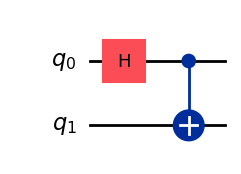

In [2]:
from qiskit import *


# Create a Quantum Circuit with 2 qubits using qiskit
qc = QuantumCircuit(2)

# Apply Hadamard gate to the first qubit
qc.h(0) 

# Apply CNOT gate with control qubit 0 and target qubit 1
qc.cx(0, 1)


qc.draw(output="mpl")


## Step 2. Setting up the output

In the world of Qiskit, you can return data in two fashions, a probability distribution across a set of qubits, or the expectation value of an observable. 

### Probability Distribution
Shows frequency of each state e.g. frquency of measuring 00, 01, 10, 11

### Expectation Values
"Gives yuo quantum mechanical averages"...yeah I can't think of a good way to explain this, so maybe I'll try to show you.

As, in this example, we measure expectation values.

To do this, we need to create 6 two-qubit Pauli Operators: IZ, IX, ZI, XI, ZZ, XX. 

### What are these you ask?

Well before we start with the two, we should probably start with the single qubit pauli matrices

The Four Pauli Matrices

#### I (Identity Matrix)
I = (1  0)
    (0  1)

Effect: Does nothing - leaves the qubit unchanged
Physical meaning: No operation applied
On |0⟩: I|0⟩ = |0⟩
On |1⟩: I|1⟩ = |1⟩

#### X (Pauli-X / NOT Gate)
X = (0  1)
    (1  0)
Effect: Flips the qubit state (bit flip)
Physical meaning: Rotation around X-axis of Bloch sphere
On |0⟩: X|0⟩ = |1⟩
On |1⟩: X|1⟩ = |0⟩

#### Y (Pauli-Y)

Y = (0  -i)
    (i   0)

Effect: Combines bit flip and phase flip
Physical meaning: Rotation around Y-axis of Bloch sphere
On |0⟩: Y|0⟩ = i|1⟩
On |1⟩: Y|1⟩ = -i|0⟩

#### Z (Pauli-Z / Phase Flip)
Effect: Flips the phase (leaves |0⟩ unchanged, adds minus sign to |1⟩)
Physical meaning: Rotation around Z-axis of Bloch sphere
On |0⟩: Z|0⟩ = |0⟩
On |1⟩: Z|1⟩ = -|1⟩



### TLDR

So long story short, the way I like to think of it (perhaps wrongly) is the these operators represent the change to the qubits value that we might expect. The expectation value of an operator is the average outcome that you would obtain 

So I represents no change before and after the quantum circuit, Y is a flip in the Y axis, and Z is a rotation in the Z axis. 

## Back to two-bit Pauli Operators

In [ ]:
# We use SparsePauliOp from the quantum_info to define observables
from qiskit.quantum_info import SparsePauliOp


observables = [
    SparsePauliOp("IZ"),  # I⊗Z: Identity on qubit 0, Z on qubit 1
    SparsePauliOp("ZI"),  # Z⊗I: Z on qubit 0, Identity on qubit 1  
    SparsePauliOp("ZZ"),  # Z⊗Z: Z measurement on both qubits
    SparsePauliOp("XX"),  # X⊗X: X measurement on both qubits
    SparsePauliOp("YY"),  # Y⊗Y: Y measurement on both qubits
]
